In [1]:
pwd

'C:\\Users\\Henry\\Classical vs others_time_series_methods'

Analytical comparison of simulation accuracy of a time series using Classical,
Vector Auto Regression, Auto Regression Moving Average, Reconvolutional Neural Network and Facebook Prophet

By Nwachukwu Henry

EvolveU IT Center
Calgary. 2021

In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
data = pd.read_csv('select_stock.csv')
data.tail()

,date,spx,dax,ftse,nikkei
6264,23/01/2018,2839.130362,13559.60,7731.827774,24124.15
6265,24/01/2018,2837.544008,13414.74,7643.428966,23940.78
6266,25/01/2018,2839.253031,13298.36,7615.839954,23669.49
6267,26/01/2018,2872.867839,13340.17,7665.541292,23631.88
6268,29/01/2018,2853.528411,13324.48,7671.533300,23629.34


In [4]:
# convert columns to integers
data.columns.values

array(['date', 'spx', 'dax', 'ftse', 'nikkei'], dtype=object)

In [5]:
cols = ['spx', 'dax', 'ftse', 'nikkei']

In [6]:
for columns in cols:
    data[columns] = data[columns].astype(int)

In [7]:
 data.head(5)

,date,spx,dax,ftse,nikkei
0,07/01/1994,469,2224,3445,18124
1,10/01/1994,475,2225,3440,18443
2,11/01/1994,474,2228,3413,18485
3,12/01/1994,474,2182,3372,18793
4,13/01/1994,472,2142,3360,18577


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    6269 non-null   object
 1   spx     6269 non-null   int32 
 2   dax     6269 non-null   int32 
 3   ftse    6269 non-null   int32 
 4   nikkei  6269 non-null   int32 
dtypes: int32(4), object(1)
memory usage: 147.1+ KB


In [9]:
# import datetime
from datetime import datetime

data.date = pd.to_datetime(data.date,dayfirst=True)
data.head(3)

,date,spx,dax,ftse,nikkei
0,1994-01-07,469,2224,3445,18124
1,1994-01-10,475,2225,3440,18443
2,1994-01-11,474,2228,3413,18485


In [10]:
data.info

<bound method DataFrame.info of            date   spx    dax  ftse  nikkei
0    1994-01-07   469   2224  3445   18124
1    1994-01-10   475   2225  3440   18443
2    1994-01-11   474   2228  3413   18485
3    1994-01-12   474   2182  3372   18793
4    1994-01-13   472   2142  3360   18577
...         ...   ...    ...   ...     ...
6264 2018-01-23  2839  13559  7731   24124
6265 2018-01-24  2837  13414  7643   23940
6266 2018-01-25  2839  13298  7615   23669
6267 2018-01-26  2872  13340  7665   23631
6268 2018-01-29  2853  13324  7671   23629

[6269 rows x 5 columns]>

In [11]:
data.set_index('date',inplace = True)

In [12]:
# set the frequency
# b representing data was only collected on business day
data =data.asfreq('b')

In [13]:
data.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [14]:
data = data.fillna(value=data.mean())
data.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

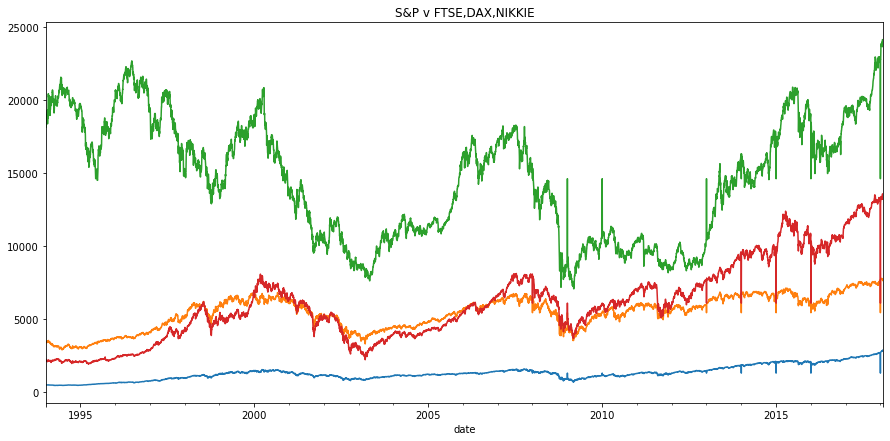

In [15]:
data.spx.plot(figsize=(15,7), title = "S&P500 Prices")
data.ftse.plot(figsize=(15,7), title = "FTSE100 Prices")
data.nikkei.plot(figsize=(15,7), title = "NIKKIE Prices")
data.dax.plot(figsize=(15,7), title = "DAX Prices")
plt.title("S&P v FTSE,DAX,NIKKIE" )
plt.show()

In [16]:
# inspect the data to test for stationarity ie using the visual and equation method
# to enhance data visualization, rolling will be applied to the data to remove noise etc

# computing for 7 day rolling average
data['rolling_avg_ftse'] = data.ftse.rolling(7).mean()

data['rolling_avg_spx'] = data.spx.rolling(7).mean() 

data['rolling_avg_dax'] = data.dax.rolling(7).mean() 

data['rolling_avg_nikkei'] = data.nikkei.rolling(7).mean()

In [17]:
data.head(10)

,spx,dax,ftse,nikkei,rolling_avg_ftse,rolling_avg_spx,rolling_avg_dax,rolling_avg_nikkei
date,,,,,,,,
1994-01-07,469.0,2224.0,3445.0,18124.0,NaN,NaN,NaN,NaN
1994-01-10,475.0,2225.0,3440.0,18443.0,NaN,NaN,NaN,NaN
1994-01-11,474.0,2228.0,3413.0,18485.0,NaN,NaN,NaN,NaN
1994-01-12,474.0,2182.0,3372.0,18793.0,NaN,NaN,NaN,NaN
1994-01-13,472.0,2142.0,3360.0,18577.0,NaN,NaN,NaN,NaN
1994-01-14,474.0,2151.0,3400.0,18973.0,NaN,NaN,NaN,NaN
1994-01-17,473.0,2115.0,3407.0,18725.0,3405.285714,473.000000,2181.000000,18588.571429
1994-01-18,474.0,2130.0,3437.0,18514.0,3404.142857,473.714286,2167.571429,18644.285714
1994-01-19,474.0,2132.0,3475.0,19039.0,3409.142857,473.571429,2154.285714,18729.428571


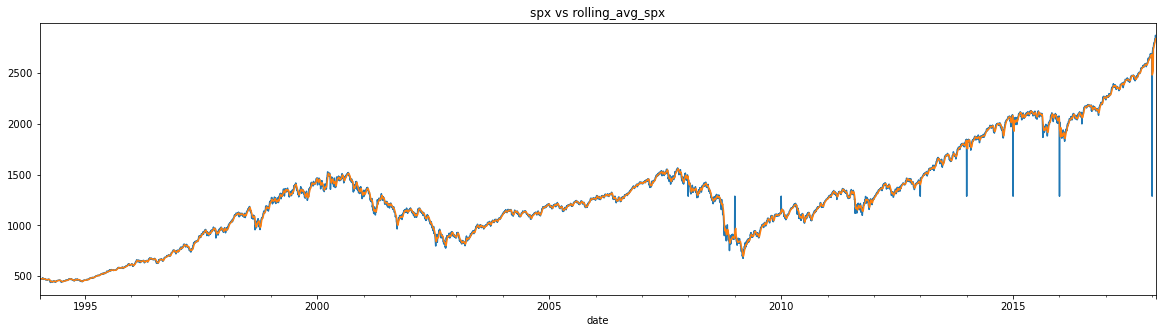

In [18]:
# We can observe that the first 6 values of the ‘7day_rolling_avg’ column are NaN values. Thisis because these 6 values don’t have enough data to compute the rolling average of 7 days. So, in the plot also, for the first six values, no values would be plotted.
data.spx.plot(figsize=(20,5), title = "spx Prices")
data.rolling_avg_spx.plot(figsize=(20,5), title = "rolling_avg_spx Prices")
plt.title("spx vs rolling_avg_spx")
plt.show()

In [19]:
# to support the visual inspection ie checking for stationarity, The DICKEY - FULLER test will be employed

# In order to interprete the statistics , we will observe the assumption made by :

# If test Statisics is < Critical value = Stationarity
# the p_value must also be statistically significant ie < 0.05
# So there fore the dataset is not stationary. And must be converteed to stationarized. But first let test if it is Seasonal or not.

import statsmodels.tsa.stattools as sts 

In [20]:
sts.adfuller(data.spx)

(1.1188910427376566,
 0.9953746684971282,
 10,
 6266,
 {'1%': -3.4313940441948807,
  '5%': -2.8620013751563964,
  '10%': -2.567015587023998},
 60760.79080693418)

In [21]:
sts.adfuller(data.ftse)

(-1.5931381220230316,
 0.4870395437055722,
 7,
 6269,
 {'1%': -3.4313935443677157,
  '5%': -2.8620011543157835,
  '10%': -2.5670154694652805},
 72354.39654218289)

In [22]:
sts.adfuller(data.nikkei)

(-1.3498416210921578,
 0.6060727404917859,
 3,
 6273,
 {'1%': -3.4313928786754726,
  '5%': -2.8620008601902893,
  '10%': -2.5670153128952853},
 88368.50767803492)

In [23]:
sts.adfuller(data.dax)

(-0.09979618860008835,
 0.9494588301162835,
 7,
 6269,
 {'1%': -3.4313935443677157,
  '5%': -2.8620011543157835,
  '10%': -2.5670154694652805},
 82201.90821292775)

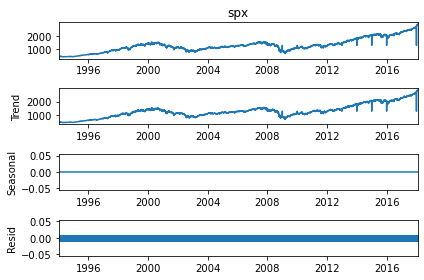

<Figure size 2880x1296 with 0 Axes>

In [24]:
# This shows that all the data are not stationalised and so needs to be stationalized. but first inspect if there is seasonality or not

# To Test for Seasonality using Naive method  ie Additive and Multiplicative

from statsmodels.tsa.seasonal import seasonal_decompose

seasonal_decompose_additive_spx= seasonal_decompose(data.spx,model="additive", period=1)
seasonal_decompose_additive_spx.plot()
plt.figure(figsize=(40,18))
plt.show()

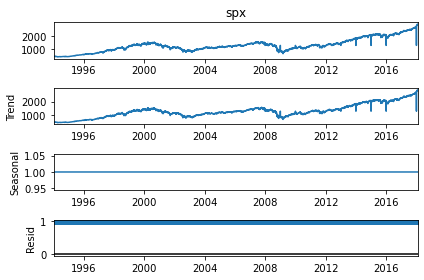

<Figure size 2880x720 with 0 Axes>

In [25]:
# To Test for Seasonality using Naive method   Multiplicative

seasonal_decompose_multiplicative_spx= seasonal_decompose(data.spx,model="multiplicative", period=1)
seasonal_decompose_multiplicative_spx.plot()
plt.figure(figsize=(40,10))
plt.show()

In [26]:
# The series does not show seasonality

# next is to stationalized the data using differencing approach. Also worthy to note is that using Returns gives a better sinulation but for sake of easy reconverting the differenced series to its initial price value, differencing will be used. effort is still made to understand how to do same for returns.
# next wiil be to Integrating the data to make them stationarized

# method 2.(Integrating)

data['int_ftse'] = data.ftse.diff(1)

data['int_dax'] = data.dax.diff(1)

data['int_nikkei'] = data.nikkei.diff(1)

data['int_spx'] = data.spx.diff(1)
data.head(3)

,spx,dax,ftse,nikkei,rolling_avg_ftse,rolling_avg_spx,rolling_avg_dax,rolling_avg_nikkei,int_ftse,int_dax,int_nikkei,int_spx
date,,,,,,,,,,,,
1994-01-07,469.0,2224.0,3445.0,18124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-10,475.0,2225.0,3440.0,18443.0,NaN,NaN,NaN,NaN,-5.0,1.0,319.0,6.0
1994-01-11,474.0,2228.0,3413.0,18485.0,NaN,NaN,NaN,NaN,-27.0,3.0,42.0,-1.0


In [27]:
data.int_spx[np.isnan(data.int_spx)] = 0
data.int_spx[np.isinf(data.int_spx)] = 0

sts.adfuller(data.int_spx)

(-31.816050690493885,
 0.0,
 9,
 6267,
 {'1%': -3.4313938775326336,
  '5%': -2.862001301519361,
  '10%': -2.5670155478252497},
 60759.98971999254)

In [28]:
data.int_dax[np.isnan(data.int_dax)] = 0
data.int_dax[np.isinf(data.int_dax)] = 0

sts.adfuller(data.int_dax)

(-37.00342416043289,
 0.0,
 6,
 6270,
 {'1%': -3.4313933778649943,
  '5%': -2.862001080749219,
  '10%': -2.567015430304048},
 82199.92205515999)

In [29]:
data.int_ftse[np.isnan(data.int_ftse)] = 0
data.int_ftse[np.isinf(data.int_ftse)] = 0

sts.adfuller(data.int_ftse)

(-34.644796335238475,
 0.0,
 6,
 6270,
 {'1%': -3.4313933778649943,
  '5%': -2.862001080749219,
  '10%': -2.567015430304048},
 72355.17399741118)

In [30]:
data.int_nikkei[np.isnan(data.int_nikkei)] = 0
data.int_nikkei[np.isinf(data.int_nikkei)] = 0

sts.adfuller(data.int_nikkei)

(-36.72306984685792,
 0.0,
 5,
 6271,
 {'1%': -3.4313932114153967,
  '5%': -2.8620010072061226,
  '10%': -2.567015391155308},
 88368.32078829122)

In [31]:
# nikkei is now stationarized

In [32]:
data = data.iloc[1:]
data.head(3)

,spx,dax,ftse,nikkei,rolling_avg_ftse,rolling_avg_spx,rolling_avg_dax,rolling_avg_nikkei,int_ftse,int_dax,int_nikkei,int_spx
date,,,,,,,,,,,,
1994-01-10,475.0,2225.0,3440.0,18443.0,NaN,NaN,NaN,NaN,-5.0,1.0,319.0,6.0
1994-01-11,474.0,2228.0,3413.0,18485.0,NaN,NaN,NaN,NaN,-27.0,3.0,42.0,-1.0
1994-01-12,474.0,2182.0,3372.0,18793.0,NaN,NaN,NaN,NaN,-41.0,-46.0,308.0,0.0


In [33]:
data.shape

(6276, 12)

In [34]:
data_1 = data.copy()

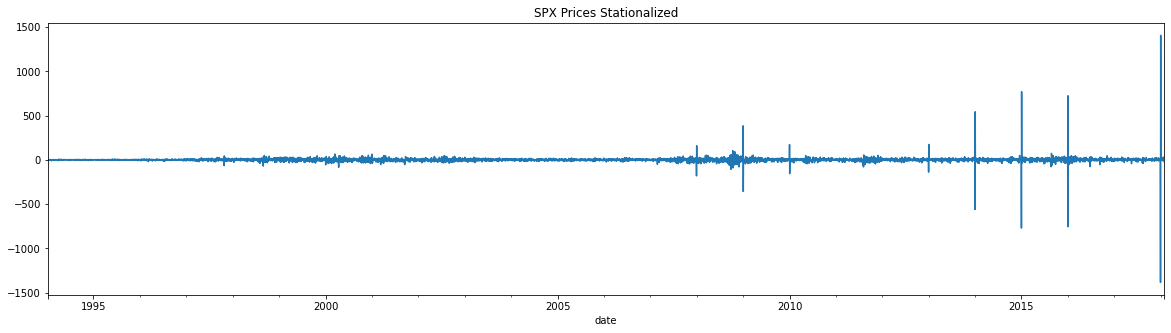

In [35]:
data.int_spx.plot(figsize=(20,5), title = "SPX Prices Stationalized")
plt.show()

In [36]:
# Now to select best model that defines the series
# Next will be to select best ARIMA Model that fits the series, We are going to follow the rules to confirm if ARIMA is satisfied
# And use Auto_ARIMA TO Select each best lag

# AR = ACF (Spikes decay towards zero)  &  PACF (Spike cut off to zero)
# MA= PACF (Spikes decay towards zero)  &  ACF (Spike cut off to zero)
# ARIMA = PACF (Spikes decay towards zero) & ACF (Spikes decay towards zero)

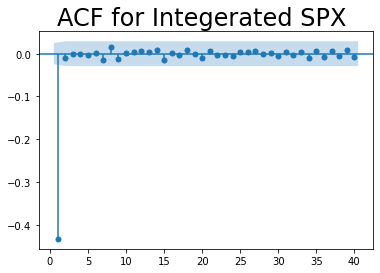

In [37]:
## ACF and PACF for Returns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.graphics.tsaplots as sgt

sgt.plot_acf(data.int_spx, zero = False, lags = 40)
plt.title("ACF for Integerated SPX ", size=24)
plt.show()

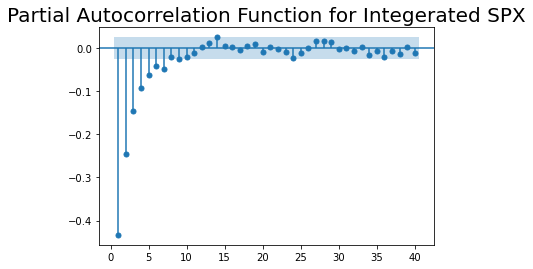

In [38]:
sgt.plot_pacf(data.int_spx, lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("Partial Autocorrelation Function for Integerated SPX",size=20)
plt.show()


# Auto _ ARIMA concept will be employed to easily select best lag time & its best model

In [39]:
from pmdarima.arima import auto_arima  
from pmdarima.arima import OCSBTest 

# I am going to be using the Akaike information criterion(AIC) as a matrix to compare the performance of various ARIMA based models
# # for seasonal we have p d q and P D Q values for ARIMA  based models# for seasonal we have p d q and P D Q values for ARIMA  based models


# returns_ftse  returns_dax   returns_spx   returns_nikkei  int_ftse  int_dax  int_nikkei   int_spx

In [40]:
model_returns_spx  = auto_arima (data.int_spx,start_p = 0, start_q = 0,max_p =5, max_q = 5, seasonal= False,trace = True )

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=62978.901, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=61677.610, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=61057.962, Time=0.34 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=61055.621, Time=0.42 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=61056.486, Time=0.85 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=61055.623, Time=1.62 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=61055.808, Time=0.43 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=61294.018, Time=0.13 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=61059.187, Time=0.75 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=61051.010, Time=1.44 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=61053.754, Time=0.97 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=61677.889, Time=0.19 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=61051.660, Time=2.13 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=61050.597, Time=5.52 sec
 ARIMA(0,0,2)(0,0,0

In [41]:
from statsmodels.tsa.arima_model import ARIMA
# Models for ftse

model_int_spx = ARIMA(data.int_spx, order=(1,0,2))
results_int_spx = model_int_spx.fit()

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\Henry\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [42]:
# Now am gonna divide the data into train and test, using nobs ( no of observation = 12)

nobs =12
train,test =data[0:-nobs],data[-nobs: ]

In [43]:
train.shape, test.shape

((6264, 12), (12, 12))

In [44]:
# for difference of price
Start_int_spx = len(train.int_spx)
end_int_spx = len(train.int_spx) + len(test.int_spx)-1

<AxesSubplot:xlabel='date'>

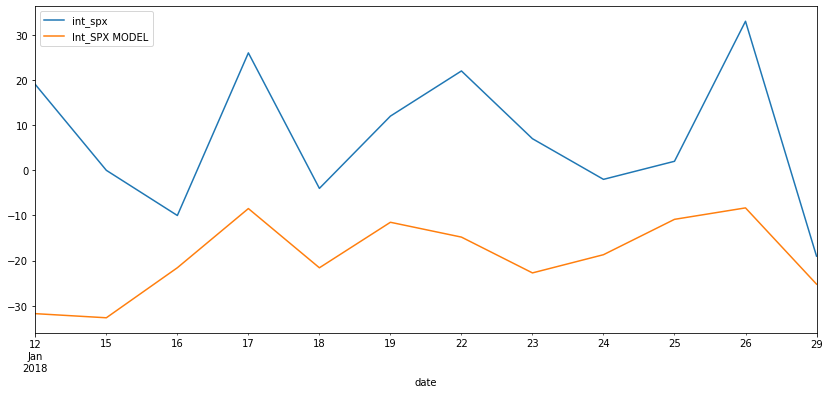

In [45]:
predictions_1 = results_int_spx.predict(Start_int_spx,end_int_spx).rename('Int_SPX MODEL')
test.int_spx.plot(legend=True,figsize =(14,6))
predictions_1.plot(legend=True)

In [46]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt


print(np.sqrt(mean_squared_error(test.int_spx,predictions_1)))

29.221417393726224


# Now I will be introducing other features and be testing if rms will be reducing

In [47]:
model_with_dax_only = auto_arima(data.int_spx, exogenous = data[['int_dax']],
                       start_p = 0, start_q = 0,max_p =5, max_q = 5, seasonal= False,trace = True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=51851.649, Time=1.12 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=51168.276, Time=0.79 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=51029.740, Time=1.16 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=51028.631, Time=2.40 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=51030.101, Time=2.39 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=51030.197, Time=2.98 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=51028.790, Time=1.33 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=51062.761, Time=1.30 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=51027.893, Time=5.43 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=51033.695, Time=2.37 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=51033.986, Time=2.78 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=51027.820, Time=4.29 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=51030.053, Time=3.56 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=51033.941, Time=2.93 sec
 ARIMA(0,0,4)(0,0,0

In [48]:
model_with_dax_only= ARIMA(data.int_spx, exog = data[['int_dax']], order = (1,0,3))
results_dax_only = model_with_dax_only.fit()

prediction_2 = results_dax_only.predict(Start_int_spx,end_int_spx, 
                                          exog = test[['int_dax']][Start_int_spx:end_int_spx]) 



C:\Users\Henry\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<AxesSubplot:xlabel='date'>

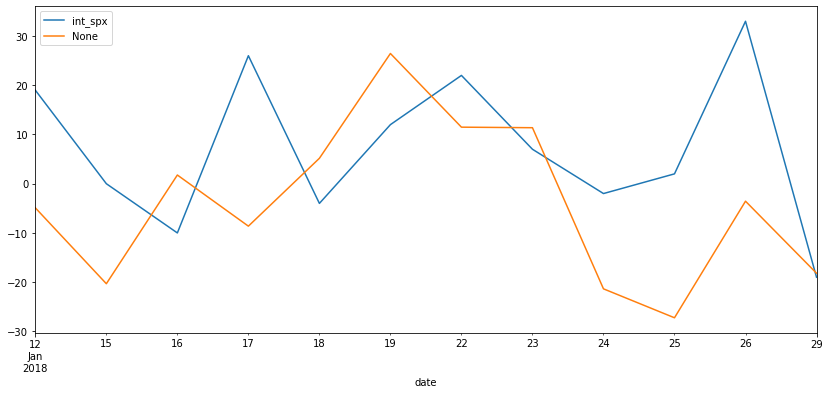

In [49]:
test.int_spx.plot(legend=True,figsize =(14,6))
prediction_2.plot(legend=True)

In [50]:
print(np.sqrt(mean_squared_error(test.int_spx,prediction_2 )))

21.035166322139656


In [51]:
# Now am gonna add ftse , dax to spx model and see if rms will reduced further

model_with_dax_ftse_only = auto_arima(data.int_spx, exogenous = data[['int_dax','int_ftse']],
                       start_p = 0, start_q = 0,max_p =5, max_q = 5, seasonal= False,trace = True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=51825.079, Time=1.67 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=51168.770, Time=1.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=51031.220, Time=1.73 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=51030.055, Time=1.77 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=51031.522, Time=1.90 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=51031.703, Time=2.08 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=51030.217, Time=2.20 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=51064.760, Time=2.05 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=51033.260, Time=2.76 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=51031.357, Time=2.35 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 19.538 seconds


In [52]:
model_with_dax_ftse_only= ARIMA(data.int_spx, exog = data[['int_dax','int_ftse']], order = (1,0,1))
results_dax_ftse_only = model_with_dax_ftse_only.fit()

prediction_3 = results_dax_ftse_only.predict(Start_int_spx,end_int_spx, 
                                          exog = test[['int_dax','int_ftse']][Start_int_spx:end_int_spx]) 


C:\Users\Henry\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<AxesSubplot:xlabel='date'>

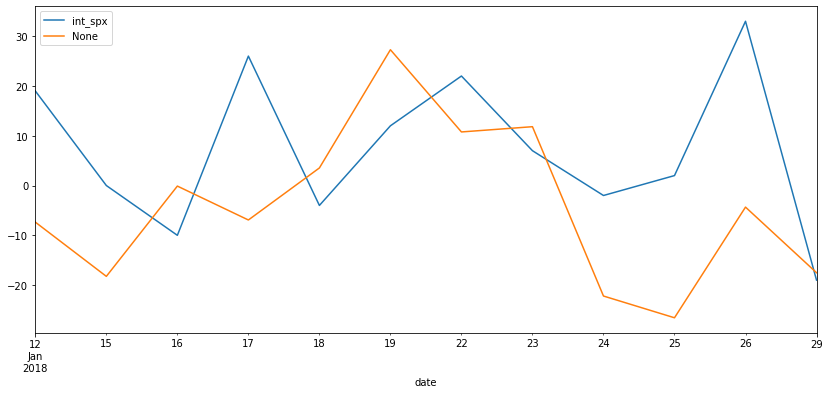

In [53]:
test.int_spx.plot(legend=True,figsize =(14,6))
prediction_3.plot(legend=True)

In [54]:
print(np.sqrt(mean_squared_error(test.int_spx,prediction_3 )))

20.953271216918978


In [55]:
# The final check will include nikkei, dax, ftse and spx

model_with_dax_ftse_nikkei= auto_arima(data.int_spx, exogenous = data[['int_dax','int_ftse','int_nikkei']],
                       start_p = 0, start_q = 0,max_p =5, max_q = 5, seasonal= False,trace = True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=51363.275, Time=2.95 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=50783.901, Time=1.27 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=50670.962, Time=1.94 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=50669.343, Time=4.44 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=50671.193, Time=5.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=50671.254, Time=6.10 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=50669.750, Time=2.74 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=50694.345, Time=4.00 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=50673.129, Time=7.42 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=50670.496, Time=5.40 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 41.307 seconds


In [56]:
model_with_dax_ftse_nikkei= ARIMA(data.int_spx, exog = data[['int_dax','int_ftse','nikkei']], order = (1,0,1))
results_dax_ftse_nikkei = model_with_dax_ftse_nikkei.fit()

prediction_4 = results_dax_ftse_nikkei.predict(Start_int_spx,end_int_spx, 
                                          exog = test[['int_dax','int_ftse']][Start_int_spx:end_int_spx]) 


C:\Users\Henry\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<AxesSubplot:xlabel='date'>

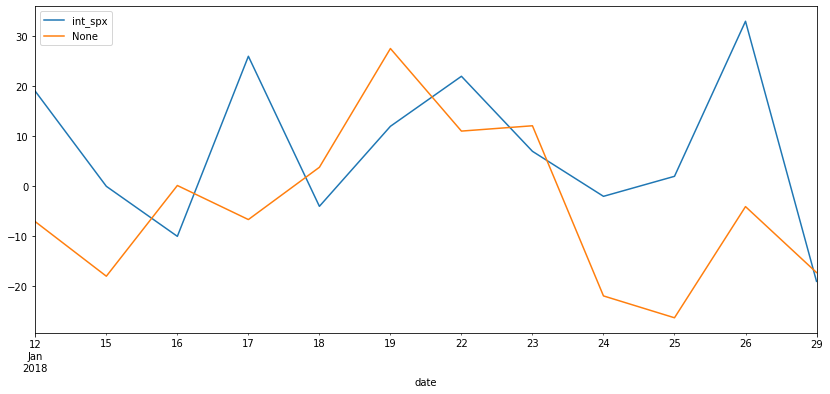

In [57]:
test.int_spx.plot(legend=True,figsize =(14,6))
prediction_4.plot(legend=True)

In [58]:
print(np.sqrt(mean_squared_error(test.int_spx,prediction_4 )))

20.802732445990323


# As can be seen, rms reduces as each feature is introduced showing they all have a relationship with spx. So the final model used for forcasting will be the combination of exog(dax,ftse & nikkei)

In [59]:
# to forcast, Am going to use the full dataset
model = ARIMA(data.int_spx, exog = data[['int_dax','int_ftse','int_nikkei']], order = (1,0,1))
result = model.fit()

C:\Users\Henry\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [60]:
exog_forecast = data[0:-nobs][['int_dax','int_ftse','int_nikkei']] 

fcast = result.predict(len(data.int_spx),len(data.int_spx)+38,exog=exog_forecast).rename('ARIMAX(1,0,1) Forecast')

C:\Users\Henry\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:827: SpecificationWarning: 
The number of observations in exog does not match the number of out-of-sample
observations.  This might indicate that exog is not correctly aligned. exog
should be aligned so that the exog[0] is used for the first out-of-sample
forecast, and exog[-1] is used for the last out-of-sample forecast.
exog is not used for in-sample observations which are the fitted values.

To silence this warning, ensure the number of observation in exog (6265)
matches the number of out-of-sample forecasts (39)'

  warnings.warn(msg, SpecificationWarning)


In [61]:
data.tail(2)

,spx,dax,ftse,nikkei,rolling_avg_ftse,rolling_avg_spx,rolling_avg_dax,rolling_avg_nikkei,int_ftse,int_dax,int_nikkei,int_spx
date,,,,,,,,,,,,
2018-01-26,2872.0,13340.0,7665.0,23631.0,7685.571429,2832.428571,13398.428571,23821.571429,50.0,42.0,-38.0,33.0
2018-01-29,2853.0,13324.0,7671.0,23629.0,7681.428571,2840.285714,13404.571429,23802.428571,6.0,-16.0,-2.0,-19.0


In [62]:
test.tail(2)

,spx,dax,ftse,nikkei,rolling_avg_ftse,rolling_avg_spx,rolling_avg_dax,rolling_avg_nikkei,int_ftse,int_dax,int_nikkei,int_spx
date,,,,,,,,,,,,
2018-01-26,2872.0,13340.0,7665.0,23631.0,7685.571429,2832.428571,13398.428571,23821.571429,50.0,42.0,-38.0,33.0
2018-01-29,2853.0,13324.0,7671.0,23629.0,7681.428571,2840.285714,13404.571429,23802.428571,6.0,-16.0,-2.0,-19.0


In [63]:
fcast.head(5)

2018-01-30    4.561454
2018-01-31    1.352056
2018-02-01   -2.356718
2018-02-02   -9.048454
2018-02-05    6.768168
Freq: B, Name: ARIMAX(1,0,1) Forecast, dtype: float64

In [64]:
fcast.shape

(39,)

<AxesSubplot:xlabel='date'>

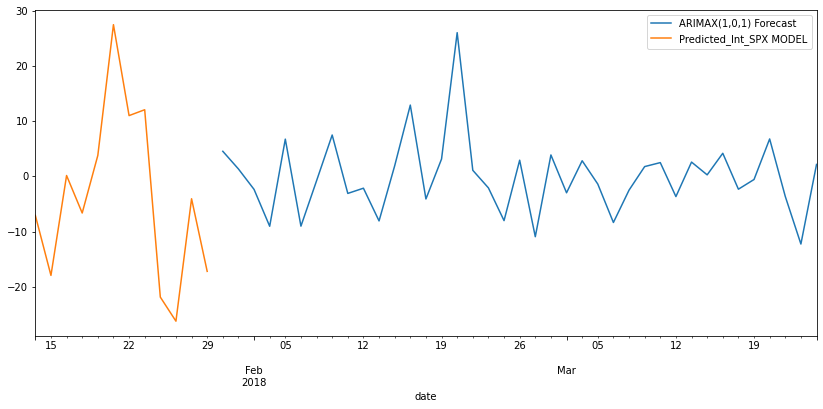

In [65]:
fcast.plot(legend=True,figsize =(14,6))
prediction_4.rename('Predicted_Int_SPX MODEL').plot(legend=True)
#test.int_spx.plot(legend=True)

In [66]:
date = pd.date_range('2018-01-30', periods=39, freq='b')

In [67]:
date

DatetimeIndex(['2018-01-30', '2018-01-31', '2018-02-01', '2018-02-02',
               '2018-02-05', '2018-02-06', '2018-02-07', '2018-02-08',
               '2018-02-09', '2018-02-12', '2018-02-13', '2018-02-14',
               '2018-02-15', '2018-02-16', '2018-02-19', '2018-02-20',
               '2018-02-21', '2018-02-22', '2018-02-23', '2018-02-26',
               '2018-02-27', '2018-02-28', '2018-03-01', '2018-03-02',
               '2018-03-05', '2018-03-06', '2018-03-07', '2018-03-08',
               '2018-03-09', '2018-03-12', '2018-03-13', '2018-03-14',
               '2018-03-15', '2018-03-16', '2018-03-19', '2018-03-20',
               '2018-03-21', '2018-03-22', '2018-03-23'],
              dtype='datetime64[ns]', freq='B')

In [68]:
df_forecast = pd.DataFrame(data = fcast.values,columns=['spx1'])

In [69]:
df_forecast.head(5)

,spx1
0,4.561454
1,1.352056
2,-2.356718
3,-9.048454
4,6.768168


In [70]:
df_forecast['date'] = date
df_forecast.head(4)

,spx1,date
0,4.561454,2018-01-30
1,1.352056,2018-01-31
2,-2.356718,2018-02-01
3,-9.048454,2018-02-02


In [71]:
df_forecast.set_index('date',inplace = True)
df_forecast.head(3)

,spx1
date,
2018-01-30,4.561454
2018-01-31,1.352056
2018-02-01,-2.356718


In [72]:
# Assuming 2 differening was done.
# df_forecast['spx1'] = (df['spx'].iloc[-nobs-1]-df['spx'].iloc[-nobs-2]) + df_forecast['spx2'].cumsum()


# Now build the forecast values from the first difference set
df_forecast['spx_forcast'] = data['spx'].iloc[-nobs-1] + df_forecast['spx1'].cumsum()

In [73]:
df_forecast.head(10)

,spx1,spx_forcast
date,,
2018-01-30,4.561454,2771.561454
2018-01-31,1.352056,2772.913510
2018-02-01,-2.356718,2770.556792
2018-02-02,-9.048454,2761.508338
2018-02-05,6.768168,2768.276506
2018-02-06,-9.029177,2759.247329
2018-02-07,-0.791077,2758.456252
2018-02-08,7.520594,2765.976846
2018-02-09,-3.085879,2762.890967


In [74]:
data.tail(1)

,spx,dax,ftse,nikkei,rolling_avg_ftse,rolling_avg_spx,rolling_avg_dax,rolling_avg_nikkei,int_ftse,int_dax,int_nikkei,int_spx
date,,,,,,,,,,,,
2018-01-29,2853.0,13324.0,7671.0,23629.0,7681.428571,2840.285714,13404.571429,23802.428571,6.0,-16.0,-2.0,-19.0


<AxesSubplot:xlabel='date'>

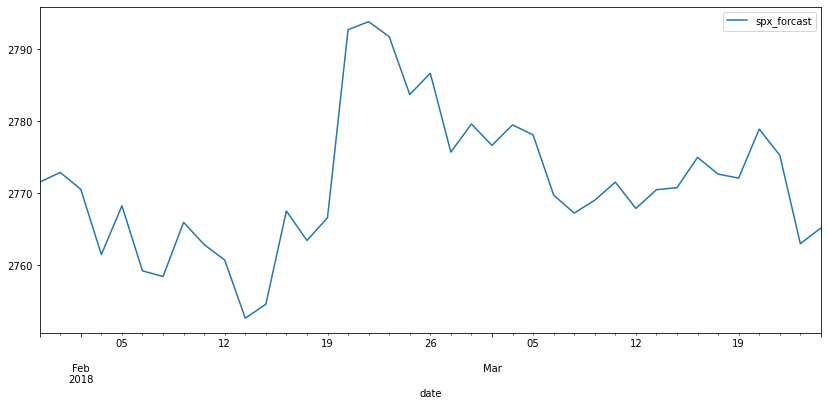

In [75]:
df_forecast.spx_forcast.plot(legend=True,figsize =(14,6))

# finally the classical model used for spx has an rms of 20.802732445990323, effort will now be made to simulate with other approaches and the rms compared.

In [76]:
data_1.head(5)

,spx,dax,ftse,nikkei,rolling_avg_ftse,rolling_avg_spx,rolling_avg_dax,rolling_avg_nikkei,int_ftse,int_dax,int_nikkei,int_spx
date,,,,,,,,,,,,
1994-01-10,475.0,2225.0,3440.0,18443.0,NaN,NaN,NaN,NaN,-5.0,1.0,319.0,6.0
1994-01-11,474.0,2228.0,3413.0,18485.0,NaN,NaN,NaN,NaN,-27.0,3.0,42.0,-1.0
1994-01-12,474.0,2182.0,3372.0,18793.0,NaN,NaN,NaN,NaN,-41.0,-46.0,308.0,0.0
1994-01-13,472.0,2142.0,3360.0,18577.0,NaN,NaN,NaN,NaN,-12.0,-40.0,-216.0,-2.0
1994-01-14,474.0,2151.0,3400.0,18973.0,NaN,NaN,NaN,NaN,40.0,9.0,396.0,2.0


In [77]:
data_1.columns.values

array(['spx', 'dax', 'ftse', 'nikkei', 'rolling_avg_ftse',
       'rolling_avg_spx', 'rolling_avg_dax', 'rolling_avg_nikkei',
       'int_ftse', 'int_dax', 'int_nikkei', 'int_spx'], dtype=object)

In [78]:
data_1 = data_1.drop(['spx', 'dax', 'ftse', 'nikkei', 'rolling_avg_ftse',
       'rolling_avg_spx', 'rolling_avg_dax', 'rolling_avg_nikkei'],axis =1)

In [79]:
data_1.head(3)

,int_ftse,int_dax,int_nikkei,int_spx
date,,,,
1994-01-10,-5.0,1.0,319.0,6.0
1994-01-11,-27.0,3.0,42.0,-1.0
1994-01-12,-41.0,-46.0,308.0,0.0


In [80]:
# Export data to be used for Reconvolutional neural network


data_1.to_csv('data_1.csv',index=True)

In [81]:
data_1.head(4)

,int_ftse,int_dax,int_nikkei,int_spx
date,,,,
1994-01-10,-5.0,1.0,319.0,6.0
1994-01-11,-27.0,3.0,42.0,-1.0
1994-01-12,-41.0,-46.0,308.0,0.0
1994-01-13,-12.0,-40.0,-216.0,-2.0


In [82]:
# Now am gonna divide the data into train and test, using nobs ( no of observation = 12)

nobs =12
train_1,test_1 =data_1[0:-nobs],data_1[-nobs: ]

# Using Auto Vector Regression

In [83]:
train_1.shape, test_1.shape

((6264, 4), (12, 4))

In [84]:
test_1.head(4)

,int_ftse,int_dax,int_nikkei,int_spx
date,,,,
2018-01-12,16.0,43.0,-57.0,19.0
2018-01-15,-9.0,-45.0,61.0,0.0
2018-01-16,-14.0,46.0,237.0,-10.0
2018-01-17,-30.0,-63.0,-83.0,26.0


In [85]:
from statsmodels.tsa.api import VAR


In [86]:
## VAR Model Order Selection
## We'll fit a series of models using the first seven p-values, and base our final selection on the model that provides the lowest AIC and BIC scores.

for i in [1,2,3,4,5,6,7]:
    model = VAR(train_1)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 1
AIC:  34.060803091874796
BIC:  34.082334034178885

Order = 2
AIC:  33.95802697924608
BIC:  33.99678794642396

Order = 3
AIC:  33.91537546090357
BIC:  33.971371140536014

Order = 4
AIC:  33.9027074446053
BIC:  33.97594252632389

Order = 5
AIC:  33.895336158013514
BIC:  33.985815333501876

Order = 6
AIC:  33.893619080976194
BIC:  34.00134704397122

Order = 7
AIC:  33.89250712614179
BIC:  34.01748857243487



In [87]:
# I will choose the one with the least aic

result = model.fit(7)
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 02, Mar, 2021
Time:                     01:10:37
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    34.0175
Nobs:                     6257.00    HQIC:                   33.9358
Log likelihood:          -141430.    FPE:                5.23997e+14
AIC:                      33.8925    Det(Omega_mle):     5.14394e+14
--------------------------------------------------------------------
Results for equation int_ftse
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 1.379510         0.977694            1.411           0.158
L1.int_ftse           0.035879         0.023178            1.548           0.122
L1.int_dax           -0.239043         0.015202          

In [88]:
lagged_value = train_1.values[-9:]
lagged_value.shape

(9, 4)

In [89]:
# the other I used 12 step time ie test data, so 12 + 9 = 21
# grab 9 lagged value right before the test data starts

z = results.forecast(y=lagged_value, steps=12)

In [90]:
# convert z to dataframe
idx = pd.date_range('2018-01-12', periods=12, freq='b')

In [91]:
df_forecast = pd.DataFrame(z, index=idx, columns=['int_ftse','int_dax','int_nikkei','int_spx'])
df_forecast.head(12)

,int_ftse,int_dax,int_nikkei,int_spx
2018-01-12,40.702169,47.631817,31.885056,-7.041103
2018-01-15,1.295737,5.408434,9.895692,0.898401
2018-01-16,2.153557,12.953014,6.610492,1.722228
2018-01-17,-11.438393,-6.384882,-9.697953,-0.333375
2018-01-18,-2.902094,-3.755174,-9.765905,0.131729
2018-01-19,-3.818346,-6.678979,-1.646483,-0.330498
2018-01-22,1.315456,2.439528,-10.863640,-0.059582
2018-01-23,1.340164,1.090802,1.505597,0.742264
2018-01-24,1.775505,2.850737,0.872327,0.256361
2018-01-25,1.088694,2.379937,2.672825,0.427878


In [92]:
test_1.head(4)

,int_ftse,int_dax,int_nikkei,int_spx
date,,,,
2018-01-12,16.0,43.0,-57.0,19.0
2018-01-15,-9.0,-45.0,61.0,0.0
2018-01-16,-14.0,46.0,237.0,-10.0
2018-01-17,-30.0,-63.0,-83.0,26.0


In [93]:
df_forecast.shape,test_1.shape

((12, 4), (12, 4))

<AxesSubplot:xlabel='date'>

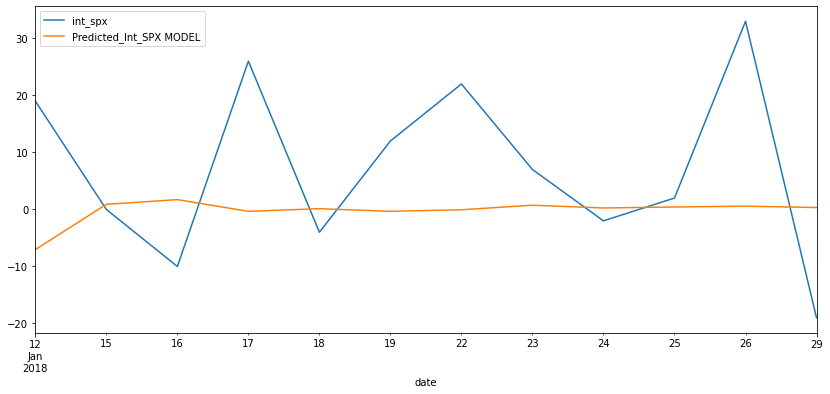

In [110]:
test_1.int_spx.plot(legend=True,figsize =(14,6))
df_forecast.int_spx.rename('Predicted_Int_SPX MODEL').plot(legend=True)


In [111]:
print(np.sqrt(mean_squared_error(test_1.int_spx,df_forecast.int_spx )))

17.409974802445518


# The vector Auto Regression has an rms of 17.409

 # Next is to simulate using Vector AutoRegression Moving Average

In [96]:
from statsmodels.tsa.statespace.varmax import VARMAX, VARMAXResults

# train_1, test_1

In [97]:
auto_arima(data_1['int_spx'],maxiter=1000)

ARIMA(maxiter=1000, order=(1, 0, 2), scoring_args={}, suppress_warnings=True)

In [98]:
auto_arima(data_1['int_nikkei'],maxiter=1000)

ARIMA(maxiter=1000, order=(0, 0, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [99]:
auto_arima(data_1['int_dax'],maxiter=1000)

ARIMA(maxiter=1000, order=(0, 0, 1), scoring_args={}, suppress_warnings=True)

In [100]:
auto_arima(data_1['int_ftse'],maxiter=1000)

ARIMA(maxiter=1000, order=(1, 0, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [101]:
# The concern with this approach is on how to select appropriate lag time for the entire series that will not over fit.

# you might want to model the suspected feature with the lag time and see its statistics ie using summary

In [102]:
model = VARMAX(train_1, order=(1,2), trend='c')
results = model.fit(maxiter=1000, disp=False)
results.summary()

C:\Users\Henry\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\Henry\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Dep. Variable:,"['int_ftse', 'int_dax', 'int_nikkei', 'int_spx']",No. Observations:,6264
Model:,"VARMA(1,2)",Log Likelihood,-141621.545
,+ intercept,AIC,283367.090
Date:,"Tue, 02 Mar 2021",BIC,283785.130
Time:,01:16:17,HQIC,283511.947
Sample:,01-10-1994,,
,- 01-11-2018,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"0.14, 0.10, 0.02, 0.01",Jarque-Bera (JB):,"7381718.46, 24003288.53, 2800300.51, 348835.13"
Prob(Q):,"0.71, 0.75, 0.88, 0.90",Prob(JB):,"0.00, 0.00, 0.00, 0.00"
Heteroskedasticity (H):,"3.00, 3.10, 1.09, 1.66",Skew:,"-5.29, -9.05, 2.55, -1.57"


In [103]:
## Predict the next 12 values
## Unlike the VAR model we used in the previous section, the VARMAX function won't require that we pass in a number of previous observations, and it will provide an extended DateTime index.

df_forecast_2 = results.forecast(12)
df_forecast_2

,int_ftse,int_dax,int_nikkei,int_spx
2018-01-12,13.146032,-64.715705,-38.987056,-31.535630
2018-01-15,-3.934224,-9.610716,-3.004955,-1.993854
2018-01-16,1.841558,5.703902,1.165893,1.201757
2018-01-17,0.142500,0.420422,0.838425,0.097627
2018-01-18,0.836979,2.230483,0.769608,0.449179
2018-01-19,0.604031,1.636442,0.967428,0.334813
2018-01-22,0.686121,1.821355,0.830413,0.369504
2018-01-23,0.659628,1.769267,0.910487,0.359758
2018-01-24,0.667787,1.781207,0.869127,0.361986
2018-01-25,0.665587,1.780020,0.889216,0.361751


<AxesSubplot:xlabel='date'>

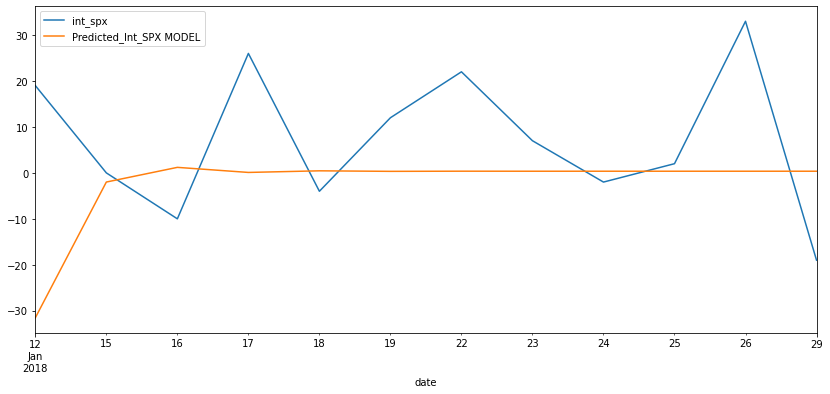

In [104]:
test_1.int_spx.plot(legend=True,figsize =(14,6))
df_forecast_2.int_spx.rename('Predicted_Int_SPX MODEL').plot(legend=True)

In [105]:
print(np.sqrt(mean_squared_error(test_1.int_spx,df_forecast_2.int_spx )))

21.351203961347185


In [106]:
from sklearn.metrics import r2_score

In [107]:
print(r2_score(test_1.int_spx,df_forecast_2.int_spx))

-1.0475933601454424


# the Vector Auto Moving Regression has an rms of 21.35

# SUMMARIZING THIS STUDY ON THIS NOTE BOOK, SO FAR, THE VECTOR AUTO REGRESSION HAS PERFORMED BETTER THAN THE CLASSICAL AND VECTOR AUTO MOVING REGRESSION.

# FURTHER EFFORT WILL BE TO SIMULATE USING RECONVULTIONAL NEURAL NETWORK AND FACEBOOK PROPHET AND MAKE FINAL CONCLUSION

# ON THE MODEL THAT PERFORM BEST.